In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [22]:
#Loading data-1
data=pd.read_csv("dataset_part_2.csv")
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [23]:
#Loading data-2
X=pd.read_csv("dataset_part_3.csv")
X.head(5)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithmns Used 
1) Logistic Regression
2) SVM
3) Decision Tree
4) K-Nearest neighbors

In [24]:
#  Creating a numpy array from the 'Class' column in `data`
Y = data['Class'].to_numpy()
Y = pd.Series(Y)
print(Y.head()) 

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [25]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [26]:
# Split the data into training and test data with test_size=0.2 and random_state=2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Y_test.shape:", Y_test.shape)


Y_test.shape: (18,)


### Logistic Regression

In [27]:


logreg = LogisticRegression()
parameters = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"], "solver": ["liblinear"]}
logreg_cv = GridSearchCV(logreg, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters):", logreg_cv.best_params_)
print("Best Accuracy:", logreg_cv.best_score_)


Tuned Hyperparameters (Best Parameters): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8339285714285714


### KNN

In [28]:

KNN = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters):", knn_cv.best_params_)
print("Best Accuracy:", knn_cv.best_score_)


Tuned Hyperparameters (Best Parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best Accuracy: 0.8339285714285714


In [29]:

accuracy_logreg = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", accuracy_logreg)

accuracy_knn = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", accuracy_knn)


Logistic Regression Test Accuracy: 0.8333333333333334
KNN Test Accuracy: 0.7777777777777778


### SVM

In [30]:

svm = SVC()
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters):", svm_cv.best_params_)
print("Best Accuracy:", svm_cv.best_score_)


Tuned Hyperparameters (Best Parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Accuracy: 0.8482142857142858


In [31]:
accuracy_svm = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", accuracy_svm)

SVM Test Accuracy: 0.8333333333333334


### Decision Tree

In [32]:


tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters):", tree_cv.best_params_)
print("Best Accuracy:", tree_cv.best_score_)


Tuned Hyperparameters (Best Parameters): {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy: 0.8767857142857143


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
 

Decision Tree Test Accuracy: 0.7777777777777778


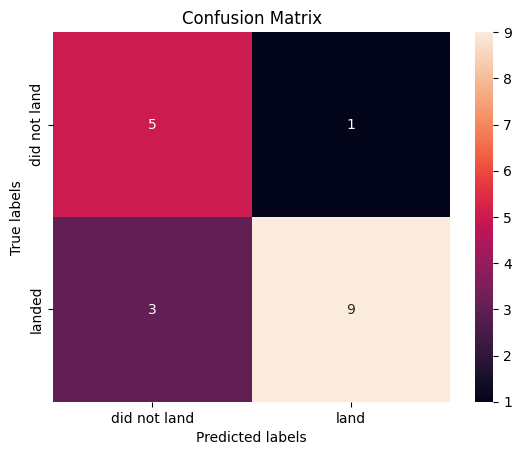

In [33]:

accuracy_tree = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", accuracy_tree)
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)


KNN Test Accuracy: 0.7777777777777778


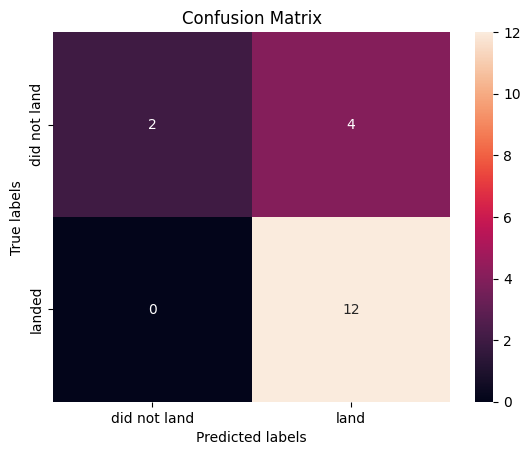

In [34]:
#KNN accuracy and Confusion matrix
accuracy_knn = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", accuracy_knn)
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)
plt.show()

### Models Comparision

In [35]:

accuracy_logreg = logreg_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)

print("Logistic Regression Test Accuracy:", accuracy_logreg)
print("K-Nearest Neighbors Test Accuracy:", accuracy_knn)
print("Support Vector Machine Test Accuracy:", accuracy_svm)
print("Decision Tree Test Accuracy:", accuracy_tree)

accuracies = {
    'Logistic Regression': accuracy_logreg,
    'K-Nearest Neighbors': accuracy_knn,
    'Support Vector Machine': accuracy_svm,
    'Decision Tree': accuracy_tree
}

best_model = max(accuracies, key=accuracies.get)
print("Best Performing Model:", best_model)


Logistic Regression Test Accuracy: 0.8333333333333334
K-Nearest Neighbors Test Accuracy: 0.7777777777777778
Support Vector Machine Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.7777777777777778
Best Performing Model: Logistic Regression
